## Neural Network

In [1]:
import pandas as pd
import numpy as np
import datetime
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [2]:
DATASET_PATH = "dataset.json"

In [3]:
btc_price_history = pd.read_json(DATASET_PATH)

In [4]:
interval = "1mm"

timestamps = pd.to_datetime(btc_price_history[interval]["ct"], unit='ms')
closing_prices = btc_price_history[interval]["c"]

y = closing_prices

X = timestamps.values.astype(int).reshape(-1, 1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

y_train = np.array(y_train)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=2)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Data: {mse}")


Epoch 1/100
2/2 - 1s - loss: 706789120.0000 - 601ms/epoch - 300ms/step
Epoch 2/100
2/2 - 0s - loss: 706786624.0000 - 6ms/epoch - 3ms/step
Epoch 3/100
2/2 - 0s - loss: 706784000.0000 - 6ms/epoch - 3ms/step
Epoch 4/100
2/2 - 0s - loss: 706781632.0000 - 5ms/epoch - 2ms/step
Epoch 5/100
2/2 - 0s - loss: 706779200.0000 - 7ms/epoch - 4ms/step
Epoch 6/100
2/2 - 0s - loss: 706776960.0000 - 5ms/epoch - 3ms/step
Epoch 7/100
2/2 - 0s - loss: 706774656.0000 - 6ms/epoch - 3ms/step
Epoch 8/100
2/2 - 0s - loss: 706772352.0000 - 6ms/epoch - 3ms/step
Epoch 9/100
2/2 - 0s - loss: 706769920.0000 - 7ms/epoch - 3ms/step
Epoch 10/100
2/2 - 0s - loss: 706767424.0000 - 7ms/epoch - 3ms/step
Epoch 11/100
2/2 - 0s - loss: 706764800.0000 - 6ms/epoch - 3ms/step
Epoch 12/100
2/2 - 0s - loss: 706762176.0000 - 7ms/epoch - 4ms/step
Epoch 13/100
2/2 - 0s - loss: 706759360.0000 - 7ms/epoch - 4ms/step
Epoch 14/100
2/2 - 0s - loss: 706756480.0000 - 8ms/epoch - 4ms/step
Epoch 15/100
2/2 - 0s - loss: 706753280.0000 - 6ms/ep

In [5]:
target_date = datetime.datetime(2023, 10, 10)
target_timestamp_seconds = target_date.timestamp()
target_timestamp_scaled = scaler.transform(np.array([[target_timestamp_seconds * 1000]]))
predicted_price = model.predict(target_timestamp_scaled)
print(f"Predicted Bitcoin Price for October 10, 2023: {predicted_price[0][0]} USDT")

1/1 [==============================] - 0s 38ms/step
Predicted Bitcoin Price for October 10, 2023: 36943.03125 USDT


Epoch 1/100
1/1 - 0s - loss: 734296256.0000 - 353ms/epoch - 353ms/step
Epoch 2/100
1/1 - 0s - loss: 669294976.0000 - 3ms/epoch - 3ms/step
Epoch 3/100
1/1 - 0s - loss: 630546944.0000 - 4ms/epoch - 4ms/step
Epoch 4/100
1/1 - 0s - loss: 731166208.0000 - 5ms/epoch - 5ms/step
Epoch 5/100
1/1 - 0s - loss: 604608576.0000 - 4ms/epoch - 4ms/step
Epoch 6/100
1/1 - 0s - loss: 748004224.0000 - 4ms/epoch - 4ms/step
Epoch 7/100
1/1 - 0s - loss: 480132160.0000 - 3ms/epoch - 3ms/step
Epoch 8/100
1/1 - 0s - loss: 950748160.0000 - 5ms/epoch - 5ms/step
Epoch 9/100
1/1 - 0s - loss: 589282304.0000 - 4ms/epoch - 4ms/step
Epoch 10/100
1/1 - 0s - loss: 684992576.0000 - 3ms/epoch - 3ms/step
Epoch 11/100
1/1 - 0s - loss: 584030016.0000 - 3ms/epoch - 3ms/step
Epoch 12/100
1/1 - 0s - loss: 1607887104.0000 - 4ms/epoch - 4ms/step
Epoch 13/100
1/1 - 0s - loss: 706569024.0000 - 4ms/epoch - 4ms/step
Epoch 14/100
1/1 - 0s - loss: 609782464.0000 - 4ms/epoch - 4ms/step
Epoch 15/100
1/1 - 0s - loss: 714394816.0000 - 3ms/e

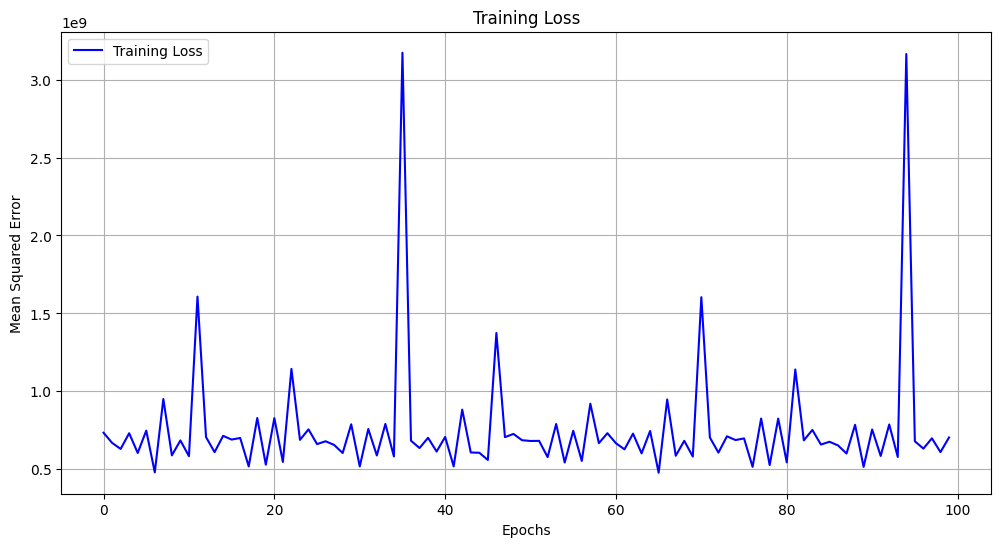

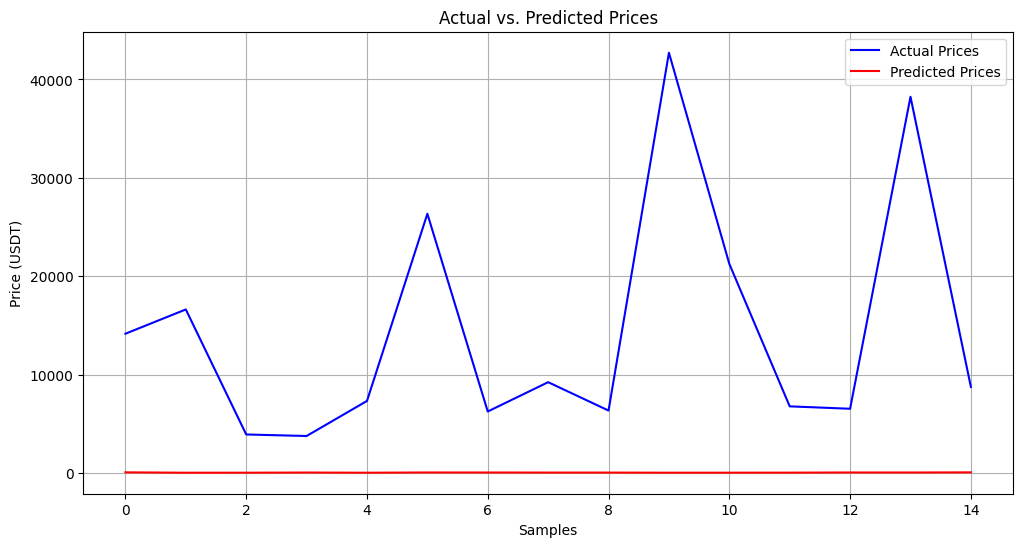

In [6]:
import matplotlib.pyplot as plt

def data_generator(X, y, batch_size):
    i = 0
    while True:
        yield X[i:i+batch_size], y[i:i+batch_size]
        i = (i + batch_size) % X.shape[0]

history = model.fit(data_generator(X_train, y_train, batch_size=32),
                    steps_per_epoch=len(X_train) // 32,
                    epochs=100, verbose=2)

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Training Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot predicted vs. actual prices
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Prices', color='blue')
plt.plot(y_pred, label='Predicted Prices', color='red')
plt.xlabel('Samples')
plt.ylabel('Price (USDT)')
plt.title('Actual vs. Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()